$$
    price_{today} = price_{yesterday}  e^{(u-1/2 \sigma^2)+\sigma[rnd(0:1)]}
$$

I will simulate 10 scenarios for the evolution of S&P 500 based on the past performance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yfin
from scipy.stats import norm
from pandas_datareader import data as pdr

C:\Users\yaser\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
tickers = ['^GSPC']
yfin.pdr_override() #  you ensure compatibility with the Yahoo Finance API changes and possibly improve the reliability and functionality of data retrieval from Yahoo Finance within your code
data = pd.DataFrame()
for t in tickers:
    data[t] = pdr.get_data_yahoo(t, start="1961-3-30", end="2024-3-30")['Adj Close']

[*********************100%%**********************]  1 of 1 completed


**log daily return**

In [3]:
log_return = np.log(data/data.shift(1))
log_return.head()

,^GSPC
Date,
1961-03-30,NaN
1961-04-03,0.008266
1961-04-04,0.000914
1961-04-05,-0.003051
1961-04-06,0.002289


In [4]:
log_return[np.isnan(log_return)] = 0
log_return.head()

,^GSPC
Date,
1961-03-30,0.000000
1961-04-03,0.008266
1961-04-04,0.000914
1961-04-05,-0.003051
1961-04-06,0.002289


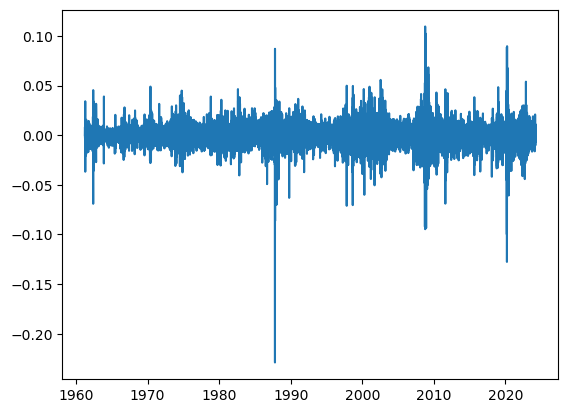

In [5]:
plt.plot(log_return)

In [6]:
## mean
u = log_return.mean()
u

^GSPC    0.000277
dtype: float64

In [7]:
## variance
var = log_return.var()
var

^GSPC    0.000108
dtype: float64

In [8]:
## standard deviation
stdev = log_return.std()
stdev

^GSPC    0.01038
dtype: float64

**drift = u - 1/2 var**

In [9]:
drift = u - 1/2 * var
drift

^GSPC    0.000223
dtype: float64

In [10]:
# z value at a given probability
norm.ppf(0.95)

1.6448536269514722

**Example to see Z value (multi-dimensional)**

In [11]:
# creating a matrix of 10 by 2 random values
x = np.random.rand(10,2)
x

array([[0.88808216, 0.7517717 ],
       [0.13090374, 0.4582151 ],
       [0.73360294, 0.66064485],
       [0.1815429 , 0.95211751],
       [0.37383225, 0.84530564],
       [0.50693868, 0.97106098],
       [0.17980581, 0.4902648 ],
       [0.75737768, 0.65347301],
       [0.59832258, 0.64704134],
       [0.41788087, 0.25200126]])

In [12]:
# z values corresponding to the random numbers that we created above
Z = norm.ppf(x)
Z

array([[ 1.21639186,  0.68007558],
       [-1.12212927, -0.10493146],
       [ 0.62374643,  0.41422369],
       [-0.90950087,  1.66574113],
       [-0.32172043,  1.01650552],
       [ 0.01739356,  1.8966205 ],
       [-0.91610541, -0.02440495],
       [ 0.69789214,  0.39471399],
       [ 0.24900769,  0.3773449 ],
       [-0.20731772, -0.66820536]])

In [13]:
t_intervals = 1000 # forcast the price for the upcoming 1000 days 
iterations = 10 # 10 future stock predictions

$$
    returns_{daily} = e^r; r = drift + volatility
$$

In [14]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns
daily_returns.shape

(1000, 10)

In [15]:
# today price (which is the last price available)
price_today = data.iloc[-1]

In [16]:
# create a price materix of zero for t_interval by iterations
price = np.zeros((t_intervals, iterations))
# today price
price[0][:] = price_today
price

array([[5254.35009766, 5254.35009766, 5254.35009766, ..., 5254.35009766,
        5254.35009766, 5254.35009766],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

In [17]:
for j in range(0, iterations):
    for t in range(1, t_intervals):
        price[t][j] = price[t-1][j] * daily_returns[t][j]

In [18]:
# Iterate over indices
#for t in range(1, t_intervals):
#    # Perform element-wise multiplication
#    price[t] = price[t-1] * daily_returns[t]

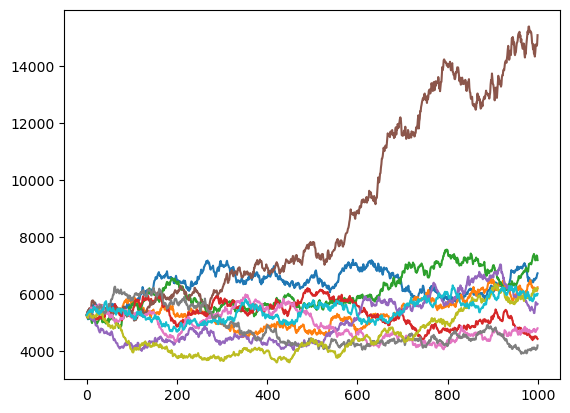

In [19]:
plt.plot(price)
plt.show()